In [1]:
import data_load_helpers as loaders
import full_width
full_width.cell_width(width_percent = '100')

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt, numpy as np
from pylab import rcParams
 
from astropy.io import ascii
from astropy.table import Table

import sys

from peak_finder import peak_finder

from astropy import units as u, constants as c

from fringe import *

from astropy.time import Time

In [ ]:
def loadnpz(filename):
    """Loads npz files"""
    a = np.load(filename)
    d = dict(zip(("data1{}".format(k) for k in a), (a[k] for k in a)))
    return d['data1arr_0']

Plot what is in the sky on observation day

In [2]:
start_time = '2018-03-23T10:00:00'
end_time = '2018-03-24T10:00:00'
times = Time([start_time, end_time], format='isot', scale = 'utc')
times_unix = times.unix
num_times_to_compute = 48. * 6.
step_size = 86400. / num_times_to_compute

# create arrays of times
time_array_unix = np.arange(times_unix[0], times_unix[1], step_size)

In [3]:
parametric_mar_23_sun_alt_az_Table = Table(ascii.read('parametric_mar_23_sun_alt_az.csv'))
parametric_mar_23_sun_alt = parametric_mar_23_sun_alt_az_Table['col0']
parametric_mar_23_sun_az = parametric_mar_23_sun_alt_az_Table['col1']

In [4]:
parametric_mar_23_moon_alt_az_Table = Table(ascii.read('parametric_mar_23_moon_alt_az.csv'))
parametric_mar_23_moon_alt = parametric_mar_23_moon_alt_az_Table['col0']
parametric_mar_23_moon_az = parametric_mar_23_moon_alt_az_Table['col1']

In [6]:
# this is the order of objects in the alts azs 2d arrays (sun / moon not present)
# cells using this are commented out

# # ras = [crab_ra, orion_ra, m17_ra, cygnus_a_ra, cass_a_ra]
# # decs = [crab_dec, orion_dec, m17_dec, cygnus_a_dec, cass_a_dec]

In [7]:
parametric_mar_23_alts_UGR = loadnpz('parametric_mar_23_alts_UGR.npz')
parametric_mar_23_azs_UGR = loadnpz('parametric_mar_23_azs_UGR.npz')

In [8]:
parametric_mar_23_hours = list(np.arange(3,24,1))
parametric_mar_23_hours.extend(list(np.arange(0,3,1)))
parametric_mar_23_str_hours = [str(abs(hour)) + ':00' for hour in parametric_mar_23_hours]

In [9]:
parametric_mar_23_x_range = np.arange(len(parametric_mar_23_sun_alt))
parametric_mar_23_num_y = len(parametric_mar_23_sun_alt)

In [3]:
def mask_y(y, threshold = 100):
    """Hides where plots wrap around from top of window to the bottom"""
    condition = abs(np.diff(y)) > threshold
    condition = np.append(condition, False)
    return np.ma.masked_where(condition, y) 

In [11]:
# fig, axes = plt.subplots(2,1, figsize = (15, 7))
# star_name = ['Sun','Moon', 'Crab Nebula', 'Orion Nebula', 'M17', 'Cygnus A', 'Cass A']

# ax = axes[0]

# for i in range(2):
#     ax = axes[i]
#     if i == 0:
#         ax.set_ylim(-120,120)
#         ax.set_yticks(np.arange(-90,120,30))

#         ax.set_ylabel('Altitude [ Degrees ]')
        
#         ax.plot(parametric_mar_23_x_range, parametric_mar_23_sun_alt, label = star_name[0], linewidth = 1, color = '#fdc70c')
#         ax.plot(parametric_mar_23_x_range, parametric_mar_23_moon_alt, label = star_name[1], linewidth = 1, color = 'black')
        
#         for j in range(len(parametric_mar_23_alts_UGR)):
#             ax.plot(parametric_mar_23_x_range,parametric_mar_23_alts_UGR[j], label = star_name[j + 2])
        
#         ax.legend(ncol = 7, loc = 'lower center')
#     else:
#         ax.set_ylim(0,360)
#         ax.set_yticks(np.arange(0,420,60))
#         ax.set_ylabel('Azimuth [ Degrees ]')
#         ax.set_xlabel('Local Time, Saturday March 3')

       
#         ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_sun_az), label = star_name[0], linewidth = 1, color = '#fdc70c')
#         ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_moon_az), label = star_name[1], linewidth = 1, color = 'black')
        
#         for j in range(len(parametric_mar_23_azs_UGR)):
#             ax.plot(parametric_mar_23_x_range,mask_y(parametric_mar_23_azs_UGR[j]))
            
# for ax in axes.reshape(-1):
#     ax.set_xticks(np.arange(num_times_to_compute)[::6*4])
#     ax.set_xticklabels(parametric_mar_23_str_hours, rotation = 45)
#     ax.set_xlim(0,parametric_mar_23_num_y)
# plt.show()

In [12]:
# fig, axes = plt.subplots(2,1, figsize = (15, 7))
# star_name = ['Sun','Moon', 'Crab Nebula', 'Orion Nebula', 'M17', 'Cygnus A', 'Cass A']

# ax = axes[0]

# for i in range(2):
#     ax = axes[i]
#     if i == 0:
#         ax.set_ylim(0,120)
#         ax.set_yticks(np.arange(0,120,30))

#         ax.set_ylabel('Altitude [ Degrees ]')
        
#         ax.plot(parametric_mar_23_x_range, parametric_mar_23_sun_alt, label = star_name[0], linewidth = 1, color = '#fdc70c')
#         ax.plot(parametric_mar_23_x_range, parametric_mar_23_moon_alt, label = star_name[1], linewidth = 1, color = 'black')
        
#         for j in range(len(parametric_mar_23_alts_UGR)):
#             ax.plot(parametric_mar_23_x_range,parametric_mar_23_alts_UGR[j], label = star_name[j + 2])
        
#         ax.legend(ncol = 7, loc = 'upper center')
#     else:
#         ax.set_ylim(90,300)
#         ax.set_yticks(np.arange(90,330,30))
#         ax.set_ylabel('Azimuth [ Degrees ]')
#         ax.set_xlabel('Local Time, Saturday March 3')

        
#         ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_sun_az), label = star_name[0], linewidth = 1, color = '#fdc70c')
#         ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_moon_az), label = star_name[1], linewidth = 1, color = 'black')
        
#         for j in range(len(parametric_mar_23_azs_UGR)):
#             ax.plot(parametric_mar_23_x_range,mask_y(parametric_mar_23_azs_UGR[j]))
            
# for ax in axes.reshape(-1):
#     ax.set_xticks(np.arange(num_times_to_compute)[::6*4])
#     ax.set_xticklabels(parametric_mar_23_str_hours, rotation = 45)
#     ax.set_xlim(0,parametric_mar_23_num_y)
# plt.show()

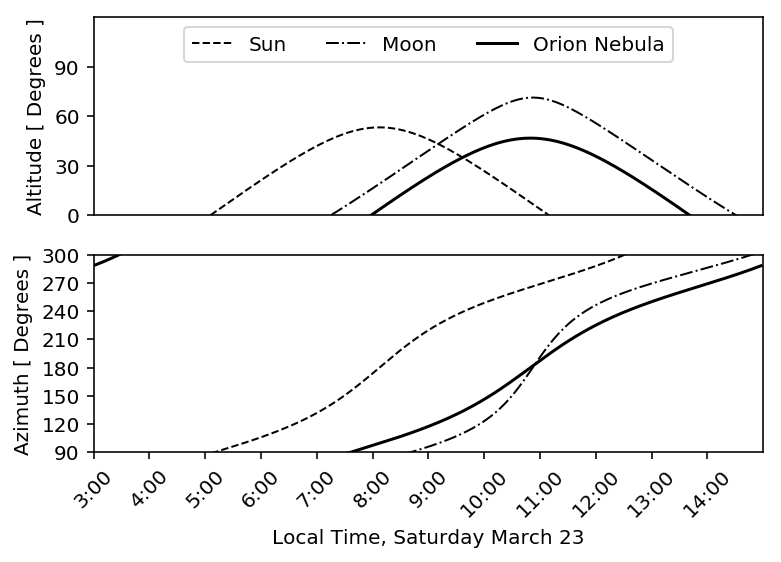

In [13]:
fig, axes = plt.subplots(2,1)
star_name = ['Sun','Moon', 'Crab Nebula', 'Orion Nebula', 'M17', 'Cygnus A', 'Cass A']

ax = axes[0]

for i in range(2):
    ax = axes[i]
    if i == 0:
        ax.set_ylim(0,120)
        ax.set_yticks(np.arange(0,120,30))

        ax.set_ylabel('Altitude [ Degrees ]')
        
        ax.plot(parametric_mar_23_x_range, parametric_mar_23_sun_alt, label = star_name[0], linewidth = 1, color = 'black', ls = '--')
        ax.plot(parametric_mar_23_x_range, parametric_mar_23_moon_alt, label = star_name[1], linewidth = 1, color = 'black', ls = '-.')
#         ax.axhline(y = 5.7, ls = ":")
        
        for j in range(2):
            if j == 1:
                ax.plot(parametric_mar_23_x_range,parametric_mar_23_alts_UGR[j], label = star_name[j + 2], color = 'black')
        
        ax.legend(ncol = 7, loc = 'upper center')
    else:
        ax.set_ylim(90,300)
        ax.set_yticks(np.arange(90,330,30))
        ax.set_ylabel('Azimuth [ Degrees ]')
        ax.set_xlabel('Local Time, Saturday March 23')



        
        ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_sun_az), label = star_name[0], linewidth = 1, color = 'black', ls = '--')
        ax.plot(parametric_mar_23_x_range, mask_y(parametric_mar_23_moon_az), label = star_name[1], linewidth = 1, color = 'black', ls = '-.')
        
        for j in range(2):
            if j == 1:
                ax.plot(parametric_mar_23_x_range,mask_y(parametric_mar_23_azs_UGR[j]), color = 'black')
            
for ax in axes.reshape(-1):
    ax.set_xticks(np.arange(num_times_to_compute)[::6*4])
    ax.set_xticklabels(parametric_mar_23_str_hours, rotation = 45)
    ax.set_xlim(0,parametric_mar_23_num_y)
    
axes[0].set_xlabel('')
axes[0].set_xticks([])
plt.show()

In [4]:
L = 37.873199 * u.deg
nu = 10.7 * u.GHz

In [101]:
orion_table = loaders.load_specific_volt_data('volts_LST_orion_mar_23.csv', LST = True)
orion_volts = orion_table['volts'] - orion_table['volts'].mean()
orion_LST   = orion_table['times']

In [102]:
test = loaders.load_specific_volt_data('observation_2458201_7844_volt_table.csv')

In [104]:
orion_ra = 83.8220833333333 * u.deg
orion_dec = -5.3911111111111 * u.deg

In [105]:
dt = 1 * u.s # sample rate
orion_seconds = np.arange(len(orion_volts)) * dt
orion_ha = hour_angle(orion_LST, orion_ra)

In [106]:
orion_polyfit = get_polyfit(orion_seconds, orion_volts, degree = 12)

In [107]:
orion_plot_hour_angles_degrees = constrain_angle_to_one_circle((np.arange(0,150, 15) - 60) * u.deg).value

xticktop_value_ha = []
for number in orion_plot_hour_angles_degrees:
    xticktop_value_ha.extend([(min(orion_ha.value, key=lambda x:abs(x-number)))])
    
xticktop_locations_ha_indices = []
for value in xticktop_value_ha:
    xticktop_locations_ha_indices.extend(np.where(orion_ha.value == value)[0])

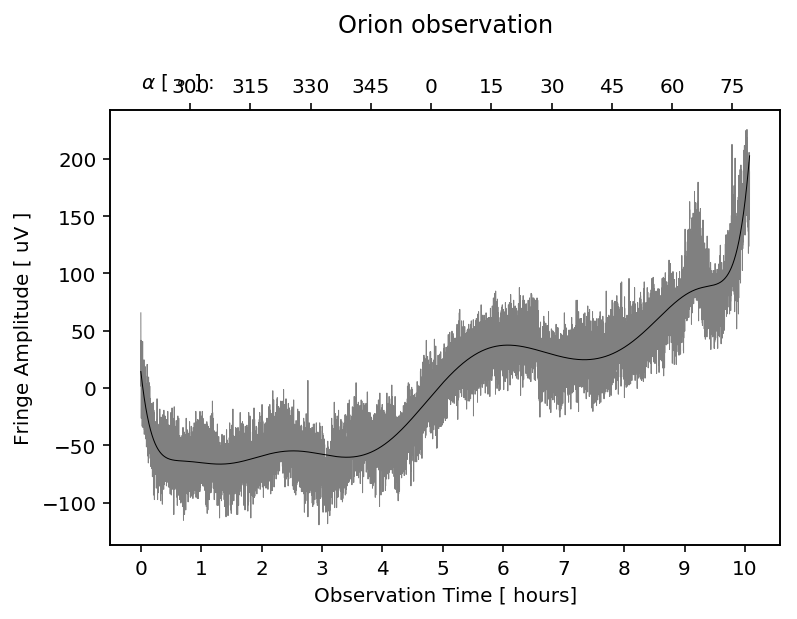

In [156]:
fig, ax = plt.subplots()
ax.plot(orion_seconds, orion_volts * 1000 * 1000, linewidth = 0.5, color = 'gray')
ax.plot(orion_seconds, orion_polyfit * 1000 * 1000, linewidth = 0.5, color = 'black')
ax.set_ylabel('Fringe Amplitude [ uV ]')

xtick_locations = np.arange(0,len(orion_volts), 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation Time [ hours]')

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = orion_seconds.value[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  orion_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel(r'$\alpha$ [ $\circ$ ] :')
axtop.xaxis.set_label_coords(.1, 1.05)

ax.set_title('Orion observation', y = 1.15)

plt.show()

In [9]:
adjusted_orion_volts = orion_volts.value - orion_polyfit

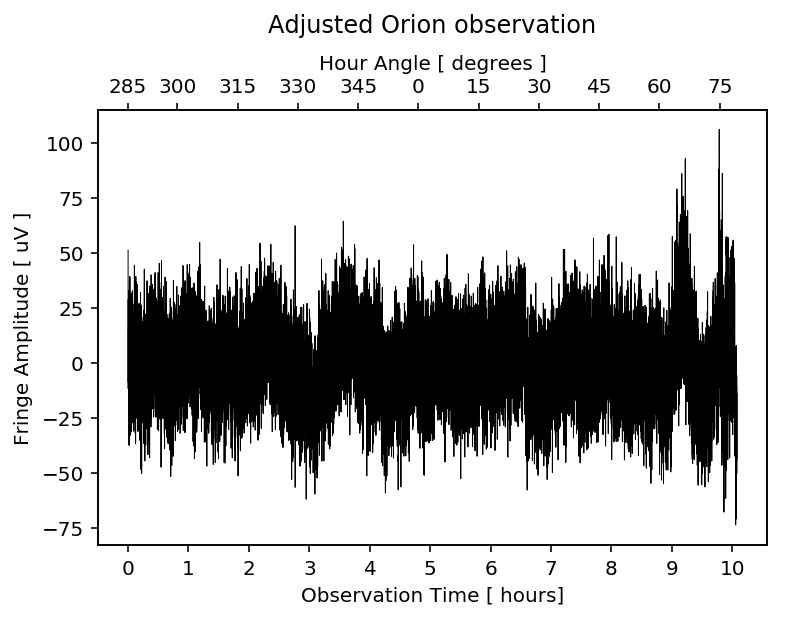

In [22]:
fig, ax = plt.subplots()
ax.plot(orion_seconds, adjusted_orion_volts * 1000 * 1000, linewidth = 0.5, color = 'black')
ax.set_ylabel('Fringe Amplitude [ uV ]')

xtick_locations = np.arange(0,len(orion_volts), 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation Time [ hours]')

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = orion_seconds.value[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  orion_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')
ax.set_title('Adjusted Orion observation', y = 1.15)

plt.show()

In [46]:
def S_mins_image(Q_ns_range, Q_ew_range, ha, b, filename = None):
    
    num_Q = len(Q_ns_range)
    S_2D = np.zeros((num_Q, num_Q))
    
    # compute minimums
    for i in range(num_Q):#ns
        for j in range(num_Q):#ew
            M = fringe_amplitude_fit_matrix(ha, Q_ew_range[j], Q_ns_range[i])
            x = solve_x(M,b)
            fit = fringe_amplitude_fit(M,x)
            S_2D[i, j] = sum_squared_residuals(b,fit)
            sys.stdout.write('\r'+str('%d, %d' %(i,j) ))
    # show plot       
    plt.imshow(np.log10(S_2D), cmap = 'gray')
    plt.xlabel('Q_ew indices')
    plt.ylabel('Q_ns indices')
    plt.title('S(Q_ns,Q_ew,ha)')
    plt.colorbar()
    plt.show()
    
    if filename != None:
        np.savez(filename, S_2D)
    
    # return Q values of minimium
    return argmin_2D(S_2D) 

In [10]:
def Q_to_baseline(Q_mins, Q_ns_range, Q_ew_range):
    Q_min_ns = Q_ns_range[Q_mins[0]]
    Q_min_ew = Q_ew_range[Q_mins[1]]
    
    print(B_ns(orion_dec, Q_min_ns))
    print(B_ew(orion_dec, Q_min_ew))

In [11]:
b = np.matrix(adjusted_orion_volts).T

Get the $S^2$ 2-D array. Commented out lines lead to the loaded npz file.

In [12]:
num_Q = 100
Q_ns_bounds0 = [Q_ns(orion_dec,B_ns = 1e-3 * u.m), Q_ns(orion_dec,B_ns = 5 * u.m)]
Q_ew_bounds0 = [Q_ew(orion_dec,B_ew = 10 * u.m), Q_ew(orion_dec,B_ew = 30 * u.m)]

Q_ns_range0 = np.linspace(Q_ns_bounds0[0], Q_ns_bounds0[1], num_Q)
Q_ew_range0 = np.linspace(Q_ew_bounds0[0], Q_ew_bounds0[1], num_Q)

# mins0 = S_mins_image(Q_ns_range0, Q_ew_range0, orion_ha, b, filename = 'S2_bounds0')
# Q_to_baseline(mins0,  Q_ns_range0, Q_ew_range0)

In [13]:
num_Q0 = 100
Q_ns_bounds1 = [Q_ns_range0[20], Q_ns_range0[40]]
Q_ew_bounds1 = [Q_ew_range0[10], Q_ew_range0[30]]

Q_ns_range1 = np.linspace(Q_ns_bounds1[0], Q_ns_bounds1[1], num_Q0)
Q_ew_range1 = np.linspace(Q_ew_bounds1[0], Q_ew_bounds1[1], num_Q0)

# mins1 = S_mins_image(Q_ns_range1, Q_ew_range1, orion_ha, b, 'S2_bounds1')
# Q_to_baseline(mins1,  Q_ns_range1, Q_ew_range1)

In [14]:
num_Q = 100
Q_ns_bounds2 = [Q_ns_range1[30], Q_ns_range1[60]]
Q_ew_bounds2 = [Q_ew_range1[60], Q_ew_range1[75]]

Q_ns_range2 = np.linspace(Q_ns_bounds2[0], Q_ns_bounds2[1], num_Q)
Q_ew_range2 = np.linspace(Q_ew_bounds2[0], Q_ew_bounds2[1], num_Q)

# mins2 = S_mins_image(Q_ns_range2, Q_ew_range2, orion_ha, b, 'S2_bounds2')
# Q_to_baseline(mins2,  Q_ns_range2, Q_ew_range2)

In [15]:
num_Q = 100
Q_ns_bounds3 = [Q_ns_range2[20], Q_ns_range2[60]]
Q_ew_bounds3 = [Q_ew_range2[30], Q_ew_range2[55]]

Q_ns_range3 = np.linspace(Q_ns_bounds3[0], Q_ns_bounds3[1], num_Q)
Q_ew_range3 = np.linspace(Q_ew_bounds3[0], Q_ew_bounds3[1], num_Q)

# mins3 = S_mins_image(Q_ns_range3, Q_ew_range3, orion_ha, b, 'S2_bounds3')
# Q_to_baseline(mins3,  Q_ns_range3, Q_ew_range3)

In [16]:
# mins3 
# # commented out mins3 produces the following output
mins3 = [46, 58]

In [17]:
S2_arr = loadnpz('S2_bounds3.npz')

In [18]:
Q_ns_star = Q_ns_range3[mins3[0]]
Q_ew_star = Q_ew_range3[mins3[1]]

Delta_Q_ns_arr = Q_ns_range3 - Q_ns_star
Delta_Q_ew_arr = Q_ew_range3 - Q_ew_star

In [81]:
Q_ns_star

31.330221126167892

In [82]:
Q_ew_star

523.94152030460248

In [19]:
B_ew_val = B_ew(orion_dec,Q_ew_star)
print(B_ew_val)

B_ns_val = B_ns(orion_dec,Q_ns_star)
print(B_ns_val)

14.745010339986731 m
1.4362060594130515 m


In [20]:
delta_S2_arr = S2_arr - S2_arr.min()

In [21]:
partial_s2_partial_Q_ew_first = np.zeros((S2_arr.shape[0] - 1, S2_arr.shape[1] - 1))
partial_s2_partial_Q_ew_second = np.zeros((S2_arr.shape[0] - 2, S2_arr.shape[1] - 2))

partial_s2_partial_Q_ew_first_xvals = np.zeros_like(partial_s2_partial_Q_ew_first)
partial_s2_partial_Q_ew_second_xvals = np.zeros_like(partial_s2_partial_Q_ew_second)

In [22]:
# for each value of Q_ns, hold it constant and compute partial S partial Q_ew
for i in range(len(Delta_Q_ns_arr) - 2):
    for j in range(len(Delta_Q_ew_arr) - 2):
        
        y = delta_S2_arr[i,:]
        x = Delta_Q_ew_arr
        
        dy = np.diff(y,1)
        dx = np.diff(x,1)
        
        yfirst = dy/dx
        partial_s2_partial_Q_ew_first[i,:] = yfirst
        
        xfirst = 0.5*(x[:-1]+x[1:])
        partial_s2_partial_Q_ew_first_xvals[i,:] = xfirst
        
        dyfirst = np.diff(yfirst,1)
        dxfirst = np.diff(xfirst,1)
        
        ysecond = dyfirst/dxfirst
        partial_s2_partial_Q_ew_second[i,:] = ysecond
        
        xsecond = 0.5*(xfirst[:-1]+xfirst[1:])
        partial_s2_partial_Q_ew_second_xvals[i,:] = xsecond
        

In [23]:
partial_s2_partial_Q_ns_first = np.zeros((S2_arr.shape[0] - 1, S2_arr.shape[1] - 1))
partial_s2_partial_Q_ns_second = np.zeros((S2_arr.shape[0] - 2, S2_arr.shape[1] - 2))

partial_s2_partial_Q_ns_first_xvals = np.zeros_like(partial_s2_partial_Q_ns_first)
partial_s2_partial_Q_ns_second_xvals = np.zeros_like(partial_s2_partial_Q_ns_second)

In [24]:
# for each value of Q_ew, hold it constant and compute partial S partial Q_ns
for i in range(len(Delta_Q_ns_arr) - 2):
    for j in range(len(Delta_Q_ns_arr) - 2):
        
        y = delta_S2_arr[:,j]
        x = Delta_Q_ns_arr
        
        dy = np.diff(y,1)
        dx = np.diff(x,1)
        
        yfirst = dy/dx
        partial_s2_partial_Q_ns_first[:,j] = yfirst = dy/dx
        
        xfirst = 0.5*(x[:-1]+x[1:])
        partial_s2_partial_Q_ns_first_xvals[:,j] = xfirst
        
        dyfirst = np.diff(yfirst,1)
        dxfirst = np.diff(xfirst,1)
        
        ysecond = dyfirst/dxfirst
        partial_s2_partial_Q_ns_second[:,j] = ysecond
        
        xsecond = 0.5*(xfirst[:-1]+xfirst[1:])
        partial_s2_partial_Q_ns_second_xvals[:,j] = xsecond
        

In [25]:
partial_s2_partial_Q_ns_partial_Q_ew = np.zeros((S2_arr.shape[0] - 2, S2_arr.shape[1] - 2))

In [26]:
# my brain hurts thinking about the description/...
for i in range(len(Delta_Q_ns_arr) - 2):
    for j in range(len(Delta_Q_ns_arr) - 2):
        
        y = partial_s2_partial_Q_ew_first[i,:]
        x = Delta_Q_ns_arr[:-1]
        
        dy = np.diff(y,1)
        dx = np.diff(x,1)
        
        yfirst = dy/dx
        partial_s2_partial_Q_ns_partial_Q_ew[i,:] = yfirst


In [27]:
alpha00 = 0.5 * partial_s2_partial_Q_ew_second[mins3[0],mins3[1]]
alpha01 = partial_s2_partial_Q_ns_partial_Q_ew[mins3[0],mins3[1]]
alpha11 = 0.5 * partial_s2_partial_Q_ns_second[mins3[0],mins3[1]]

In [75]:
# alpha = np.matrix([[alpha00, alpha01], [alpha01, alpha11]])
# covar = S2_arr.min()* alpha.I
# np.savez('covar', covar)
covar = loadnpz('covar.npz')

In [76]:
Q_ew_err = covar[0,0]
print(Q_ew_err)
Q_ns_err = covar[1,1]
print(Q_ns_err)

-0.0165655349667
-0.112583238245


In [77]:
B_ew_err = abs(Q_ew_err * wavelength(10.7 * u.GHz) / np.cos(orion_dec))
B_ew_err

<Quantity 0.00046619512847423974 m>

In [78]:
B_ns_err = abs(Q_ns_err * wavelength(10.7 * u.GHz) / (np.cos(orion_dec) * np.sin(L)))
B_ns_err

<Quantity 0.00516091885544023 m>

In [79]:
M = fringe_amplitude_fit_matrix(orion_ha, Q_ew_star,Q_ns_star)
x = solve_x(M,b)
A = x[0,0]
B = x[1,0]
print(A)
print(B)

3.01263920411e-06
-3.28236898342e-06


In [98]:
tau_c_prime = (np.arctan2(-B,A) / (2 * np.pi * nu)).to(u.ns)
print(tau_c_prime)

0.012319190112135009 ns


In [99]:
tau_c = tau_c_prime + (B_ns_val/c.c) * np.cos(L) * np.sin(orion_dec)
print(tau_c)

-0.3429782143887501 ns


In [71]:
cable_length_diference = abs((tau_c * c.c).to(u.cm))
cable_length_diference

<Quantity 10.282228193205437 cm>

In [96]:
tau_g_prime = ((B_ew_val/c.c) * np.cos(orion_dec) * np.sin(orion_ha) + \
              (B_ns_val/c.c) * np.sin(L) * np.cos(orion_dec) * np.cos(orion_ha)).to(u.ns)

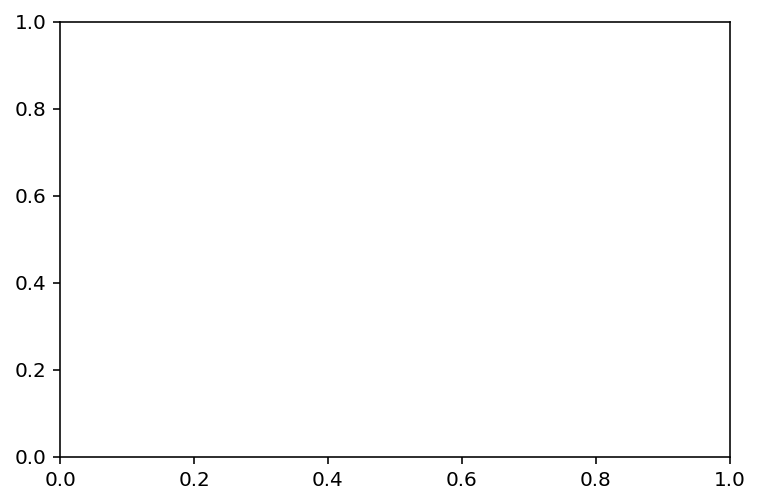

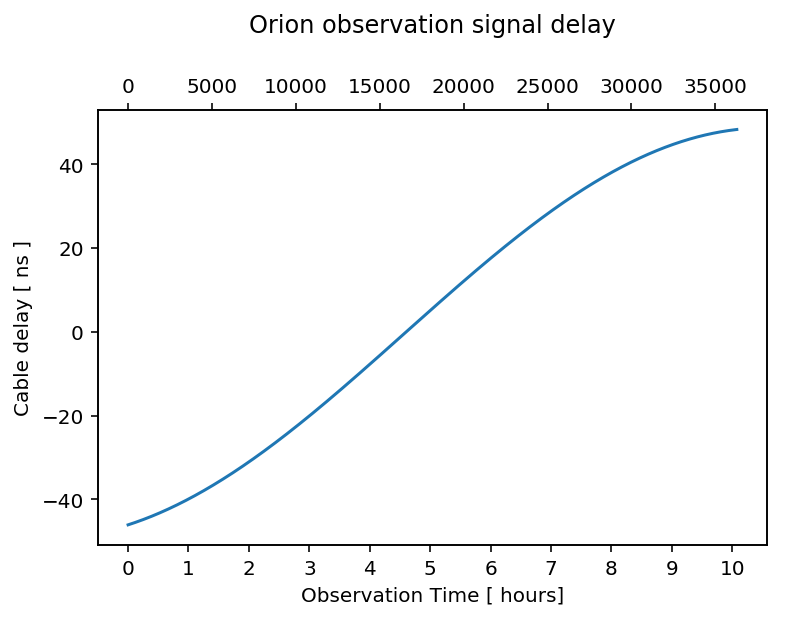

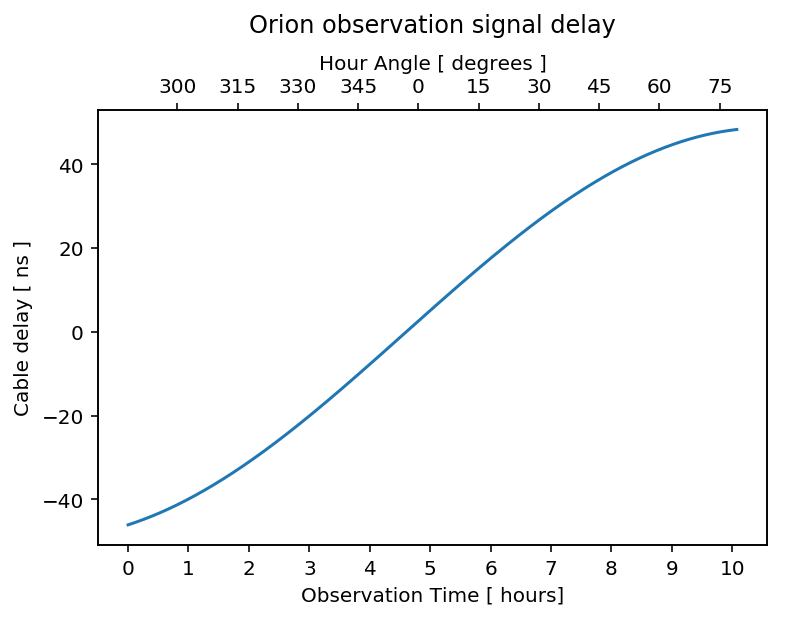

In [108]:
fig, ax = plt.subplots()
ax.plot(tau_g_prime + tau_c)
ax.set_title('Orion observation signal delay', y = 1.15)
ax.set_ylabel('Cable delay [ ns ]')

xtick_locations = np.arange(0,len(orion_volts), 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation Time [ hours]')

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = orion_seconds.value[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  orion_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')



plt.show()

In [74]:
orion_window_len = 1200 #seconds
orion_remainder = int(len(orion_volts) % orion_window_len)

orion_short_volts = orion_volts[:-orion_remainder]
orion_short_times = orion_volts[:-orion_remainder]

orion_VLA = np.zeros((len(orion_short_volts) - orion_window_len , orion_window_len))
for i in range(len(orion_short_volts) - orion_window_len):
    orion_window = orion_short_volts[i: orion_window_len + i]
    orion_VLA[i,:] = np.fft.fftshift(np.abs(np.fft.fft(orion_window))**2)
    sys.stdout.write('\r'+str('%d' %i ))

34799

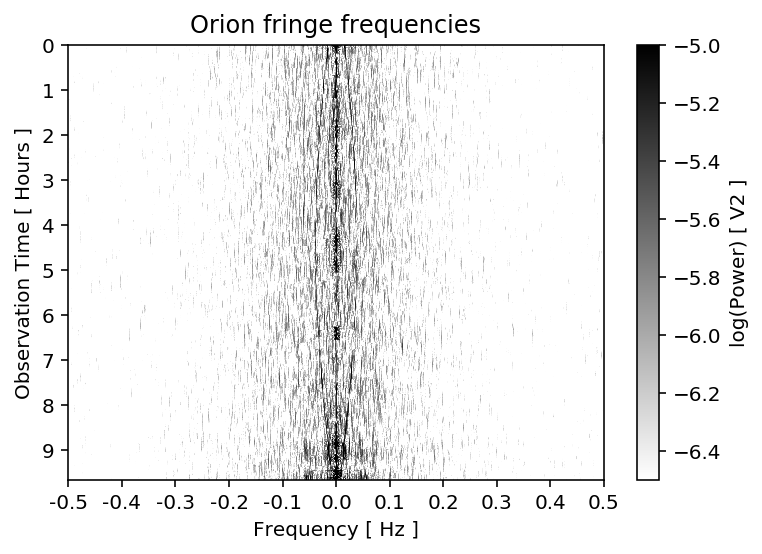

In [75]:
orion_no_dc_min_max  = np.copy(orion_VLA)

for i in range(orion_no_dc_min_max.shape[0]):
    orion_no_dc_min_max[i][595:605] = np.mean(orion_no_dc_min_max[i][0:300])

plt.imshow(np.log10(orion_VLA), aspect = 'auto',
           cmap = 'binary',
           interpolation='none', vmax=-5, vmin=-6.5)

ytick_locations = np.arange(0,orion_VLA.shape[0] + orion_window_len)[::orion_window_len][::3]
ytick_labels = [str(int(x)) for x in  np.arange(0,orion_VLA.shape[0] + orion_window_len)[::orion_window_len][::3] / 3600]
plt.yticks(ytick_locations, ytick_labels)
plt.ylabel('Observation Time [ Hours ]')

xtick_locations = np.arange(0,orion_window_len + orion_window_len/10)[::60][0::2]
freqs = np.round(np.fft.fftshift(np.fft.fftfreq(orion_window_len))[::60], decimals = 2)[0::2]
xtick_labels = np.append(freqs, abs(freqs[0]))
plt.xticks(xtick_locations, xtick_labels)
plt.xlabel('Frequency [ Hz ]')

cbar = plt.colorbar()
cbar.set_label('log(Power) [ V2 ]')
plt.title('Orion fringe frequencies')
plt.show()

In [76]:
orion_peaksVLA = np.zeros((orion_no_dc_min_max.shape[0], 2))
    
for i in range(orion_no_dc_min_max.shape[0]):
    sys.stdout.write('\r'+str('%d' %i ))
    
    orion_threshold_delta = 0
    num_peaks = 0
    counter = 0
    while(True):
        if counter == 20:
            peaks = [0,0]
            break
        orion_threshold = orion_no_dc_min_max[i].max() - orion_threshold_delta
#         sys.stdout.write('\r'+str('%f' %orion_threshold ))
        peaks = peak_finder(orion_no_dc_min_max[i], orion_threshold)
        
        num_peaks = len(peaks)
        if num_peaks == 2:
            break
        if num_peaks == 3:
            peaks = [peaks[0], peaks[2]]
            break
#         sys.stdout.write('\r'+str('%f' %num_peaks ))
        orion_threshold_delta += orion_no_dc_min_max[i].max() * .001
        counter += 1
        

        
    orion_peaksVLA[i] = peaks

34799

In [77]:
orion_peak_indicies = np.array(orion_peaksVLA.T[1][:], dtype = int)
orion_freqs_range = np.fft.fftshift(np.fft.fftfreq(orion_window_len))
orion_fringe_freqs_actual = orion_freqs_range[orion_peak_indicies]

In [78]:
orion_fringe_freqs_theory = np.zeros(len(orion_fringe_freqs_actual))
for i in range(len(orion_fringe_freqs_actual)):
    orion_fringe_freqs_theory[i] = fringe_freqs(orion_ha[i], orion_dec)
    sys.stdout.write('\r'+str('%d' %i ))

34799

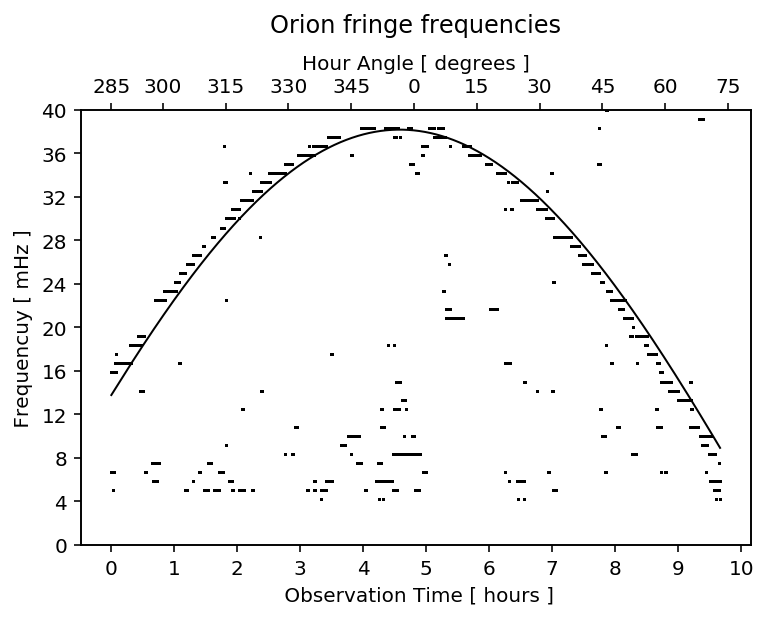

In [79]:
fig, ax = plt.subplots()
ax.plot(orion_fringe_freqs_actual, markersize = 0.5, color = 'black', marker = 's', ls = 'none')
ax.plot(orion_fringe_freqs_theory * 2 * np.pi / (24 * 60 * 60) , linewidth =1, color ='black')
ax.set_ylim(0, 0.04)

ytick_locations = np.linspace(0,0.04, 11)
ytick_labels = [str(int(x)) for x in  ytick_locations * 1000]
plt.yticks(ytick_locations, ytick_labels)
ax.set_ylabel(' Frequencuy [ mHz ] ')

xtick_locations = np.arange(0,len(orion_volts), 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel(' Observation Time [ hours ]')
axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = orion_seconds.value[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  orion_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')


ax.set_title('Orion fringe frequencies', y = 1.15)
plt.show()

In [46]:
sun_table = Table(ascii.read('volts_LST_HA_sun_mar_23.csv'))
sun_ha = sun_table['sun_has'] * u.deg

sun_ra_decs = Table(ascii.read('sun_10_hour_ra_decs.csv'))
sun_ra = sun_ra_decs['col0'] * u.deg
sun_decs = sun_ra_decs['col1'] * u.deg

sun_table = loaders.load_specific_volt_data(path = 'Sun_HPM_Data/sun_observation_2458188_56627_volt_table.csv')
sun_volts = sun_table['volts'].value - np.mean(sun_table['volts'].value)
sun_times = sun_table['times'].value


In [39]:
len(sun_ha)

38266

In [47]:
sun_ha = sun_ha[300:]

sun_ra = sun_ra[300:]
sun_decs = sun_decs[300:]

sun_volts = sun_volts[300:]
sun_times = sun_times[300:]

In [48]:
sun_times[0]

1520694461.9151909

In [83]:
sun_plot_hour_angles_degrees = constrain_angle_to_one_circle((np.arange(0,165, 15) - 75) * u.deg).value

xticktop_value_ha = []
for number in sun_plot_hour_angles_degrees:
    xticktop_value_ha.extend([(min(sun_ha.value, key=lambda x:abs(x-number)))])
    
xticktop_locations_ha_indices = []
for value in xticktop_value_ha:
    xticktop_locations_ha_indices.extend(np.where(sun_ha.value == value)[0])

In [84]:
sun_plot_hour_angles_degrees

array([ 285.,  300.,  315.,  330.,  345.,    0.,   15.,   30.,   45.,
         60.,   75.])

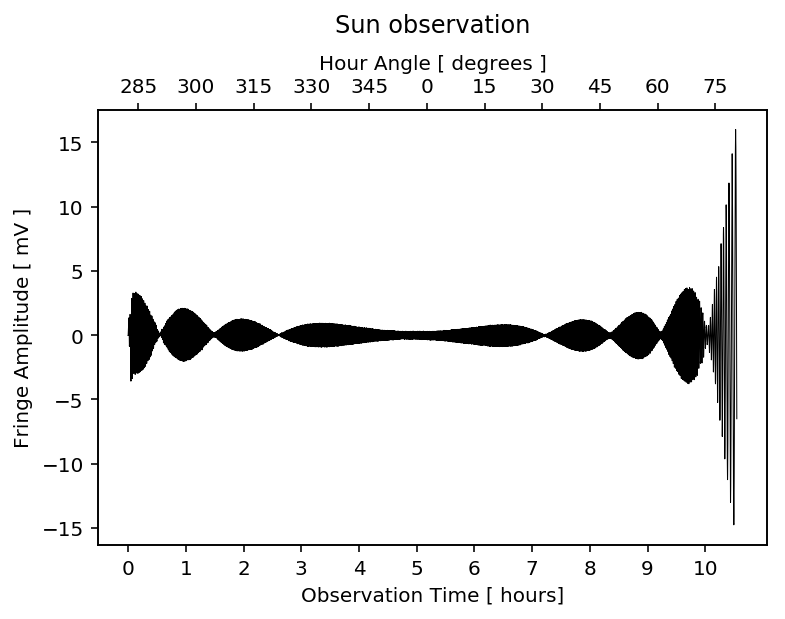

In [85]:
fig, ax = plt.subplots()
ax.plot(sun_times - sun_times[0], sun_volts * 1000 , linewidth = 0.5, color = 'black')
ax.set_ylabel('Fringe Amplitude [ mV ]')

xtick_locations = np.arange(0,len(sun_volts), 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation Time [ hours]')

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = (sun_times - sun_times[0])[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  sun_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')
ax.set_title('Sun observation', y = 1.15)

plt.show()

In [86]:
sun_window_len = 1200 #seconds
sun_remainder = int(len(sun_volts) % sun_window_len)

sun_short_volts = sun_volts[:-sun_remainder]
sun_short_times = sun_volts[:-sun_remainder]

sun_VLA = np.zeros((len(sun_short_volts) - sun_window_len , sun_window_len))
for i in range(len(sun_short_volts) - sun_window_len):
    sun_window = sun_short_volts[i: sun_window_len + i]
    sun_VLA[i,:] = np.fft.fftshift(np.abs(np.fft.fft(sun_window*np.blackman(sun_window_len)))**2)
    sys.stdout.write('\r'+str('%d' %i ))

35999

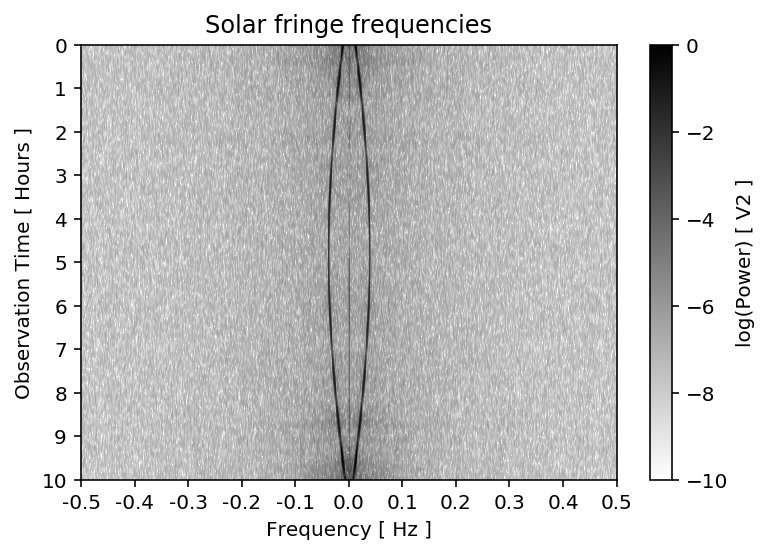

In [87]:
plt.imshow(np.log10(sun_VLA), aspect = 'auto',
           cmap = 'binary',
           interpolation='none',
           vmin = -10,
           vmax = 0)

ytick_locations = np.arange(0,sun_VLA.shape[0] + sun_window_len)[::sun_window_len][::3]
ytick_labels = [str(int(x)) for x in  np.arange(0,sun_VLA.shape[0] + sun_window_len)[::sun_window_len][::3] / 3600]
plt.yticks(ytick_locations, ytick_labels)
plt.ylabel('Observation Time [ Hours ]')

xtick_locations = np.arange(0,sun_window_len + sun_window_len/10)[::60][0::2]
freqs = np.round(np.fft.fftshift(np.fft.fftfreq(sun_window_len))[::60], decimals = 2)[0::2]
xtick_labels = np.append(freqs, abs(freqs[0]))
plt.xticks(xtick_locations, xtick_labels)
plt.xlabel('Frequency [ Hz ]')

cbar = plt.colorbar()
cbar.set_label('log(Power) [ V2 ]')
plt.title('Solar fringe frequencies')
plt.show()

In [88]:
sun_peaksVLA = np.zeros((sun_VLA.shape[0], 2))
    
for i in range(sun_VLA.shape[0]):
    sys.stdout.write('\r'+str('%d' %i ))
    
    sun_threshold = 0
    num_peaks = 0
    while(num_peaks != 2):
        sun_threshold = sun_threshold -0.25
        peaks = peak_finder(np.log10(sun_VLA[i]), sun_threshold)
        num_peaks = len(peaks)
        
    sun_peaksVLA[i] = peaks

35999

In [89]:
sun_peak_indicies = np.array(sun_peaksVLA.T[1][:], dtype = int)
sun_freqs_range = np.fft.fftshift(np.fft.fftfreq(sun_window_len))
sun_fringe_freqs_actual = sun_freqs_range[sun_peak_indicies]

In [90]:
sun_fringe_freqs_theory = np.zeros(len(sun_fringe_freqs_actual))
for i in range(len(sun_fringe_freqs_actual)):
    sun_fringe_freqs_theory[i] = fringe_freqs(sun_ha[i], sun_decs[i])
    sys.stdout.write('\r'+str('%d' %i ))

35999

In [91]:
sun_fringe_freqs_theory_Hz = sun_fringe_freqs_theory * 2 * np.pi / (24 * 60 * 60)

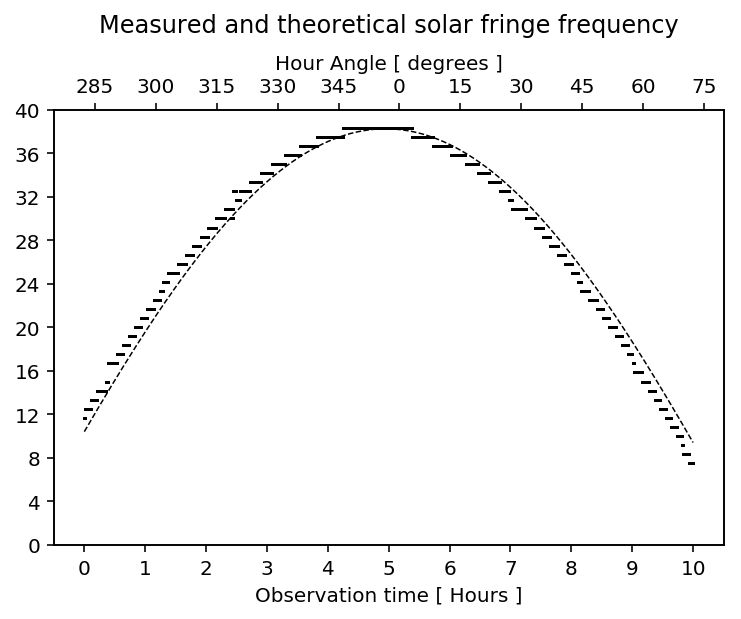

In [92]:
fig, ax = plt.subplots()
plt.plot(sun_fringe_freqs_actual, markersize = 0.5, marker = 's',linestyle = 'none', color = 'black')
plt.plot(sun_fringe_freqs_theory_Hz, linewidth = 0.75, linestyle = '--',color = 'black')
xtick_locations = np.arange(0,sun_VLA.shape[0] + sun_window_len)[::sun_window_len][::3]
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = (sun_times - sun_times[0])[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  sun_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')




ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation time [ Hours ]')
ytick_locations = np.linspace(0,0.04, 11)
ytick_labels = [str(int(x)) for x in  ytick_locations * 1000]
plt.yticks(ytick_locations, ytick_labels)
plt.ylabel('Frequency [ mHz ]')

plt.title('Measured and theoretical solar fringe frequency', y = 1.15)
plt.ylim(0)
plt.show()

In [93]:
sun_fringe_freqs_theory = np.zeros(len(sun_volts))
for i in range(len(sun_volts)):
    sun_fringe_freqs_theory[i] = fringe_freqs(sun_ha[i], sun_decs[i])
    sys.stdout.write('\r'+str('%d' %i ))

37965

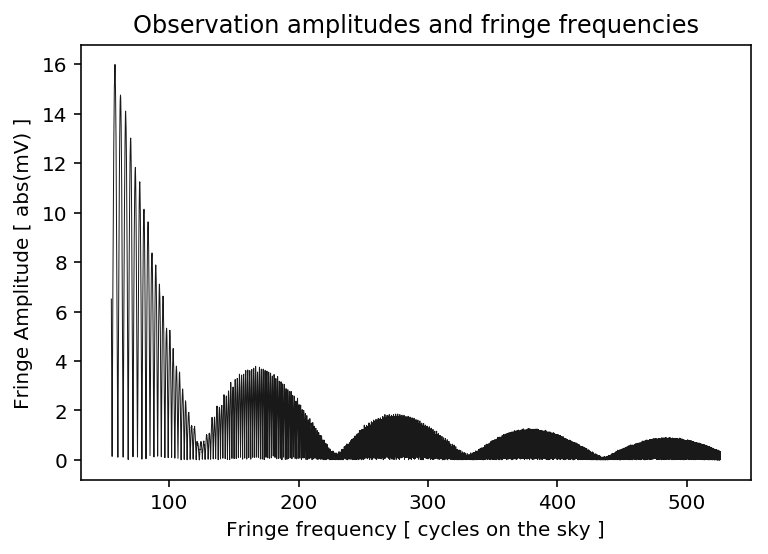

In [94]:
plt.plot(sun_fringe_freqs_theory[18000:], abs(sun_volts[18000:] * 1000), linewidth = 0.5, alpha = 0.9, color = 'black')
plt.xlabel('Fringe frequency [ cycles on the sky ]')
plt.ylabel('Fringe Amplitude [ abs(mV) ]')
plt.title('Observation amplitudes and fringe frequencies')
plt.show()


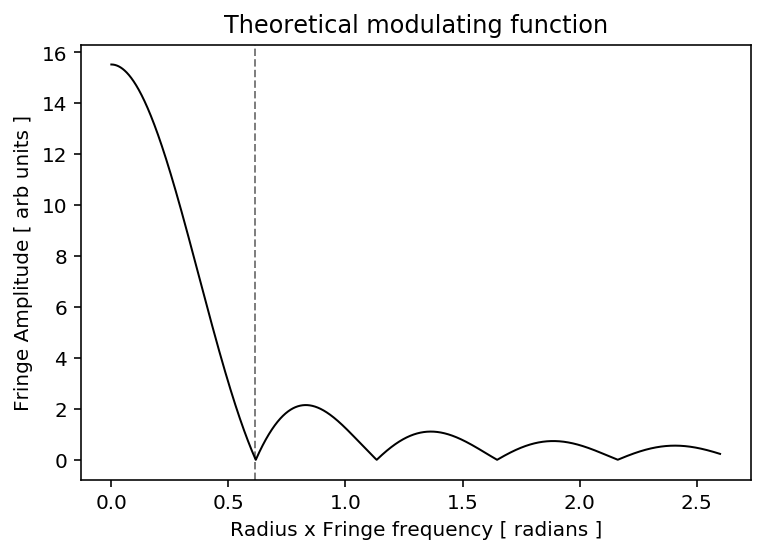

In [95]:
N = 10
Rf = np.linspace(0,2.6,num = len(sun_volts[18000:]))
MF_theory = np.zeros(len(sun_volts[18000:]))

for n in np.arange(-N,N,1):
    
    MF_theory += np.sqrt(1 - (n/N)**2 ) * np.cos(2 * np.pi * n * Rf/ N)

plt.plot(Rf, abs(MF_theory), linewidth = 1, color = 'black')
plt.axvline(0.615, ls = '--', color = 'black', alpha = 0.5, linewidth = 1)
plt.xlabel('Radius x Fringe frequency [ radians ]')
plt.ylabel('Fringe Amplitude [ arb units ]')
plt.title('Theoretical modulating function')
plt.show()

In [67]:
solar_diameter_radians = 2 * (0.615 / 124.5) * u.rad
solar_diameter_degrees = solar_diameter_radians.to(u.deg)
solar_diameter_meters = (np.sin(solar_diameter_degrees) * u.AU).to(u.m)
solar_diameter_kilometers = solar_diameter_meters.to(u.km)
solar_diameter_degrees

<Quantity 0.5660546891653916 deg>

In [68]:
solar_true_diameter = 2 * c.R_sun

In [73]:
solar_diameter_degrees.to(u.rad)

<Quantity 0.009879518072289156 rad>

In [98]:
solar_diameter_percent_error = 100 * (solar_diameter_meters - solar_true_diameter) / solar_true_diameter
solar_diameter_percent_error

<Quantity 6.248297983155657>

In [99]:
np.sin(solar_diameter_degrees)

<Quantity 0.00987935735821521>

In [100]:
solar_diameter_radians

<Quantity 0.009879518072289156 rad>

In [40]:
moon_table = loaders.load_specific_volt_data('moon_observation_2458204_96498_volt_table.csv')
moon_volts = moon_table['volts'] - np.mean(moon_table['volts'])
moon_times = moon_table['times']

In [102]:
moon_lst = loadnpz('moon_time_lst.npz')
moon_ras = loadnpz('moon_ras.npz')
moon_decs = loadnpz('moon_decs.npz')

In [103]:
moon_ha = hour_angle(moon_lst * u.rad, moon_ras * u.deg)

In [104]:
moon_ha

<Quantity [ 310.22177375, 310.22580944, 310.22985424,...,   95.94228496,
             95.94628487,  95.95028881] deg>

In [105]:
moon_plot_hour_angles_degrees = constrain_angle_to_one_circle((np.arange(0,150, 15) - 45) * u.deg).value

xticktop_value_ha = []
for number in moon_plot_hour_angles_degrees:
    xticktop_value_ha.extend([(min(moon_ha.value, key=lambda x:abs(x-number)))])
    
xticktop_locations_ha_indices = []
for value in xticktop_value_ha:
    xticktop_locations_ha_indices.extend(np.where(moon_ha.value == value)[0])

In [106]:
moon_plot_hour_angles_degrees

array([ 315.,  330.,  345.,    0.,   15.,   30.,   45.,   60.,   75.,   90.])

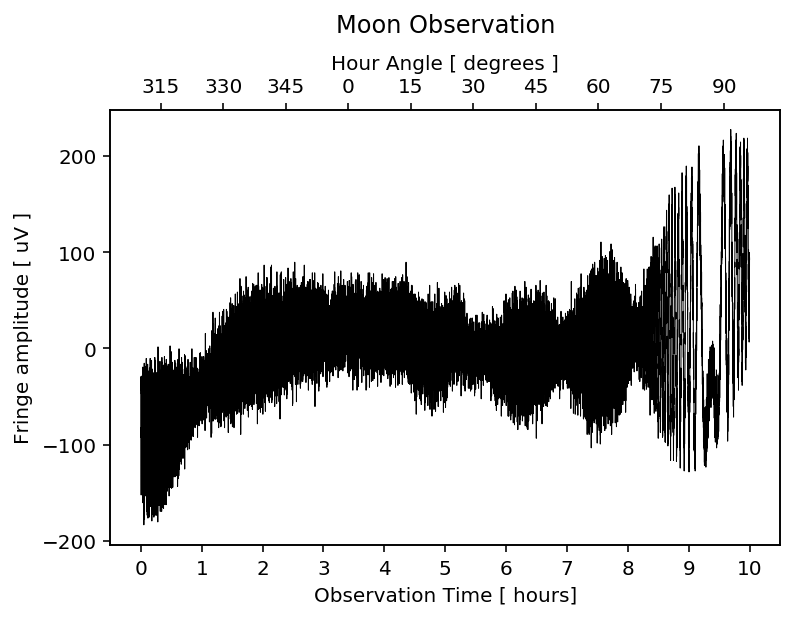

In [107]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(moon_volts)), moon_volts * 1000 * 1000, linewidth = 0.5, color = 'black')
ax.set_ylabel('Fringe amplitude [ uV ]')

xtick_locations = np.arange(0,len(moon_volts) + 3600, 3600)
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]
ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation Time [ hours]')

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = (moon_times.value - moon_times[0].value)[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  moon_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')

ax.set_title('Moon Observation', y = 1.15)
plt.show()

In [108]:
moon_window_len = 1200 #seconds
moon_remainder = int(len(moon_volts) % moon_window_len)

moon_short_volts = moon_volts[:-moon_remainder]
moon_short_times = moon_volts[:-moon_remainder]

moon_VLA = np.zeros((len(moon_short_volts) - moon_window_len , moon_window_len))
for i in range(len(moon_short_volts) - moon_window_len):
    moon_window = moon_short_volts[i: moon_window_len + i]
    moon_VLA[i,:] = np.fft.fftshift(np.abs(np.fft.fft(moon_window*np.blackman(moon_window_len)))**2)
    sys.stdout.write('\r'+str('%d' %i ))

33599

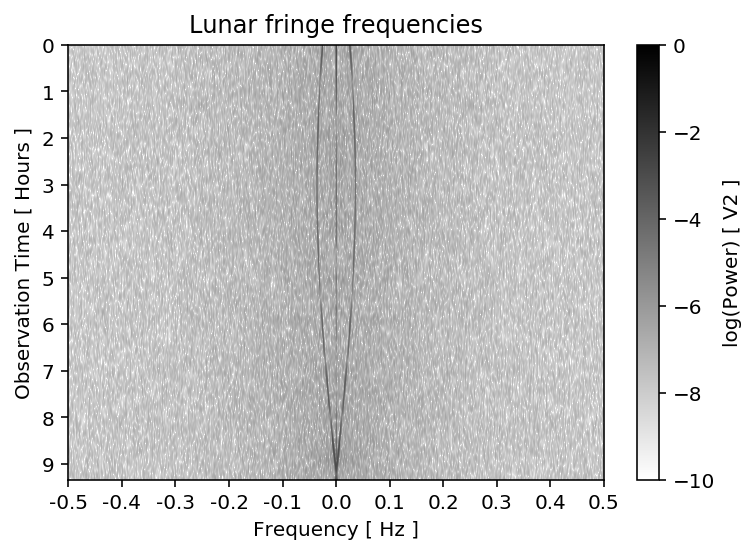

In [109]:


plt.imshow(np.log10(moon_VLA), aspect = 'auto',
           cmap = 'binary',
           interpolation='none',
           vmin = -10,
           vmax = 0)

ytick_locations = np.arange(0,moon_VLA.shape[0] + moon_window_len)[::moon_window_len][::3]
ytick_labels = [str(int(x)) for x in  np.arange(0,moon_VLA.shape[0] + moon_window_len)[::moon_window_len][::3] / 3600]
plt.yticks(ytick_locations, ytick_labels)
plt.ylabel('Observation Time [ Hours ]')

xtick_locations = np.arange(0,moon_window_len + moon_window_len/10)[::60][0::2]
freqs = np.round(np.fft.fftshift(np.fft.fftfreq(moon_window_len))[::60], decimals = 2)[0::2]
xtick_labels = np.append(freqs, abs(freqs[0]))
plt.xticks(xtick_locations, xtick_labels)
plt.xlabel('Frequency [ Hz ]')

cbar = plt.colorbar()
cbar.set_label('log(Power) [ V2 ]')
plt.title('Lunar fringe frequencies')
plt.show()

In [110]:
moon_no_dc_min_max  = np.copy(moon_VLA)

for i in range(moon_no_dc_min_max.shape[0]):
    moon_no_dc_min_max[i][596:604] = np.mean(moon_no_dc_min_max[i][0:300])

In [111]:
moon_peaksVLA = np.zeros((moon_VLA.shape[0], 2))
    
for i in range(moon_VLA.shape[0]):
    sys.stdout.write('\r'+str('%d' %i ))
    
    moon_threshold_delta = 0
    num_peaks = 0
    counter = 0
    while(True):
        moon_threshold = moon_no_dc_min_max[i].max() - moon_threshold_delta
        peaks = peak_finder((moon_no_dc_min_max[i]), moon_threshold)
        num_peaks = len(peaks)
        moon_threshold_delta = moon_no_dc_min_max[i].max() * .001
        counter += 1
        if counter == 20:
            peaks = [0,0]
            break
        if num_peaks == 2:
            break
    moon_peaksVLA[i] = peaks

33599

In [113]:
moon_peak_indicies = np.array(moon_peaksVLA.T[1][:], dtype = int)
moon_freqs_range = np.fft.fftshift(np.fft.fftfreq(moon_window_len))
moon_fringe_freqs_actual = moon_freqs_range[moon_peak_indicies]

In [114]:
moon_fringe_freqs_theory = np.zeros(len(moon_fringe_freqs_actual))
for i in range(len(moon_fringe_freqs_actual)):
    moon_fringe_freqs_theory[i] = fringe_freqs(moon_ha[i], moon_decs[i] * u.deg)
    sys.stdout.write('\r'+str('%d' %i ))

33599

In [115]:
moon_fringe_freqs_theory_Hz = moon_fringe_freqs_theory * 2 * np.pi / (24 * 60 * 60)

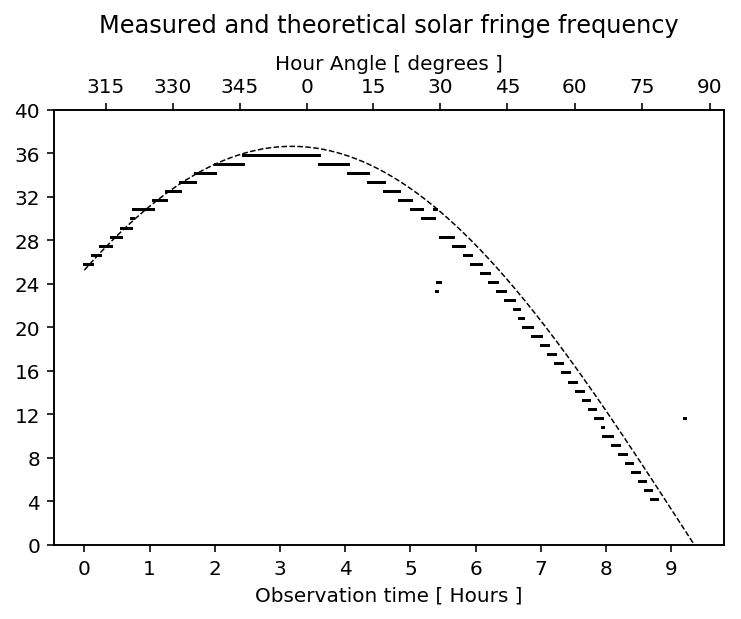

In [116]:
fig, ax = plt.subplots()
plt.plot(moon_fringe_freqs_actual, markersize = 0.5, marker = 's',linestyle = 'none', color = 'black')
plt.plot(moon_fringe_freqs_theory_Hz, linewidth = 0.75, linestyle = '--',color = 'black')
xtick_locations = np.arange(0,moon_VLA.shape[0] + moon_window_len)[::moon_window_len][::3]
xtick_labels = [str(int(x)) for x in  xtick_locations / 3600]

axtop = ax.twiny()
axtop.set_xlim(ax.get_xlim())
xticktop_locations = (moon_times.value - moon_times[0].value)[xticktop_locations_ha_indices]
xticktop_labels = [str(int(x)) for x in  moon_plot_hour_angles_degrees]
axtop.set_xticks(xticktop_locations)
axtop.set_xticklabels(xticktop_labels)
axtop.set_xlabel('Hour Angle [ degrees ]')




ax.set_xticks(xtick_locations)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('Observation time [ Hours ]')
ytick_locations = np.linspace(0,0.04, 11)
ytick_labels = [str(int(x)) for x in  ytick_locations * 1000]
plt.yticks(ytick_locations, ytick_labels)
plt.ylabel('Frequency [ mHz ]')

plt.title('Measured and theoretical solar fringe frequency', y = 1.15)
plt.ylim(0, .04)
plt.show()

In [117]:
moon_fringe_freqs_theory = np.zeros(len(moon_volts))
for i in range(len(moon_volts)):
    moon_fringe_freqs_theory[i] = fringe_freqs(moon_ha[i], moon_decs[i] * u.deg)
    sys.stdout.write('\r'+str('%d' %i ))

35997

In [118]:
len(moon_fringe_freqs_theory)

35998

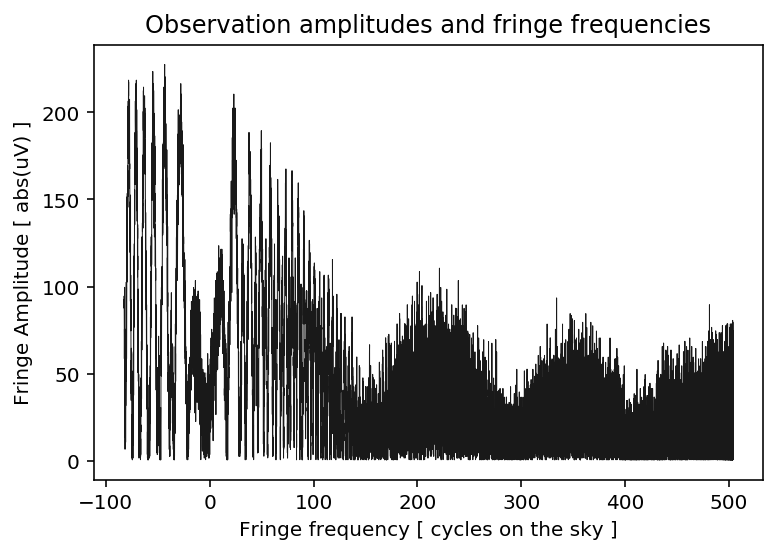

In [119]:
plt.plot(moon_fringe_freqs_theory[10800:], abs(moon_volts[10800:] * 1000 * 1000), linewidth = 0.5, alpha = 0.9, color = 'black')
plt.xlabel('Fringe frequency [ cycles on the sky ]')
plt.ylabel('Fringe Amplitude [ abs(uV) ]')
plt.title('Observation amplitudes and fringe frequencies')
plt.show()



In [85]:
lunar_diameter_radians = 2 * (0.615 / 151) * u.rad
lunar_diameter_degrees = lunar_diameter_radians.to(u.deg)
lunar_diameter_meters = (np.sin(lunar_diameter_degrees) * 365030 * u.km).to(u.m)
lunar_diameter_kilometers = lunar_diameter_meters.to(u.km)
lunar_diameter_degrees

<Quantity 0.4667139655701407 deg>

In [56]:
R_moon = (1737.4 * u.km).to(u.m) # nasa

In [62]:
lunar_true_diameter = 2 * R_moon

In [58]:
lunar_diameter_percent_error = 100 * (lunar_diameter_meters - lunar_true_diameter) / lunar_true_diameter
lunar_diameter_percent_error

<Quantity -11.389467101022062>

Just some calculations / scratch work

In [59]:
np.sin(lunar_diameter_degrees)

<Quantity 0.008145605283528269>

In [61]:
lunar_diameter_radians.to(u.arcsec)

<Quantity 1680.1702760525066 arcsec>

In [64]:
lunar_true_diameter.to(u.km)

<Quantity 3474.8 km>

In [65]:
lunar_diameter_kilometers

<Quantity 3079.0387971736855 km>

In [66]:
(0.00814 * u.rad).to(u.deg)

<Quantity 0.46638764523649007 deg>

In [74]:
0.615 / 124.5

0.004939759036144578

<Quantity 1486707.4791235435 m>

In [89]:
(R_moon - (np.sin(lunar_diameter_degrees / 2) * 365030 * u.km).to(u.m)) / (R_moon)

<Quantity 0.14429176981492836>

In [92]:
np.sin(lunar_diameter_degrees / 2) * 365030 * u.km

<Quantity 1486.7074791235434 km>

In [94]:
1486.7075 * 0.76

1129.8977

In [95]:
R_moon * 0.76

<Quantity 1320424.0 m>